In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Importing data

In [3]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df = pd.DataFrame(data)

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
print(X)

[[13300000 7420 4 ... 'yes' 2 'yes']
 [12250000 8960 4 ... 'yes' 3 'no']
 [12250000 9960 3 ... 'no' 2 'yes']
 ...
 [1750000 3620 2 ... 'no' 0 'no']
 [1750000 2910 3 ... 'no' 0 'no']
 [1750000 3850 3 ... 'no' 0 'no']]


In [7]:
print(y)

['furnished' 'furnished' 'semi-furnished' 'furnished' 'furnished'
 'semi-furnished' 'semi-furnished' 'unfurnished' 'furnished' 'unfurnished'
 'furnished' 'semi-furnished' 'semi-furnished' 'furnished'
 'semi-furnished' 'semi-furnished' 'unfurnished' 'furnished' 'furnished'
 'semi-furnished' 'semi-furnished' 'unfurnished' 'furnished' 'furnished'
 'furnished' 'furnished' 'semi-furnished' 'semi-furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'semi-furnished' 'furnished' 'unfurnished'
 'furnished' 'furnished' 'furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'furnished' 'furnished' 'unfurnished' 'semi-furnished'
 'furnished' 'semi-furnished' 'furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'unfurnished' 'furnished' 'semi-furnished'
 'semi-furnished' 'unfurnished' 'semi-furnished' 'furnished'
 'semi-furnished' 'furnished' 'semi-furnished' 'semi-furnished'
 'furnished' 'furnished' 'furnished' 'furnished' 'furnished' 'unfurnished'
 'furnished' 'furnished' 's

## Preprocessing Data

Checking for null/missing values

In [10]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
print(y)

[0 0 1 0 0 1 1 2 0 2 0 1 1 0 1 1 2 0 0 1 1 2 0 0 0 0 1 1 2 1 2 1 0 2 0 0 0
 0 2 1 0 0 2 1 0 1 0 0 2 1 2 2 0 1 1 2 1 0 1 0 1 1 0 0 0 0 0 2 0 0 1 2 2 0
 0 1 0 0 0 0 1 1 0 1 1 0 2 1 2 0 1 0 0 1 1 1 0 1 2 2 2 2 1 0 0 2 1 2 1 1 1
 2 0 0 0 1 2 0 0 1 0 1 1 0 0 1 2 2 0 1 2 1 1 2 1 2 2 1 1 0 2 1 1 2 0 0 1 1
 1 1 2 1 0 1 1 0 1 0 1 0 0 1 1 1 0 2 2 1 0 1 1 1 2 2 2 1 0 1 1 1 1 0 1 1 0
 2 0 1 2 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 0 1 1 2 2 1 0 1 2 1 1
 1 0 2 1 1 0 1 1 1 1 0 2 1 1 1 1 1 0 1 1 0 0 1 2 1 2 1 0 1 1 1 0 1 2 0 0 1
 0 0 1 1 1 1 1 2 1 1 2 0 1 1 0 1 0 1 1 1 0 2 0 2 0 0 1 0 2 2 1 1 2 1 2 1 1
 1 2 1 0 1 1 2 0 1 1 1 1 1 1 1 1 0 1 1 1 2 2 1 1 0 1 0 1 1 1 2 1 1 0 2 0 1
 1 0 0 1 2 1 0 1 1 0 1 1 1 1 2 1 1 1 1 2 0 0 0 0 0 1 2 1 1 0 1 1 0 0 2 1 0
 1 1 1 0 1 2 1 2 1 2 1 1 0 0 0 2 2 1 2 1 2 1 1 2 2 2 1 0 2 1 2 2 2 2 2 2 2
 0 2 2 2 0 2 2 2 0 2 0 2 1 2 2 2 2 1 0 0 0 2 2 2 2 0 1 1 2 0 2 1 2 2 2 2 2
 0 0 2 1 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 1 2 1 1 1 0 2 2 1 2 2 1 2 2 2 2 1
 0 2 1 2 2 1 2 2 1 2 0 2 

In [13]:
from sklearn import preprocessing

In [14]:
label_encoder = preprocessing.LabelEncoder()
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])

In [15]:
df['mainroad'].unique()

array([1, 0])

In [16]:
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])

In [17]:
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])

In [18]:
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])

In [19]:
df['furnishingstatus'].unique()

array([0, 1, 2])

In [20]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


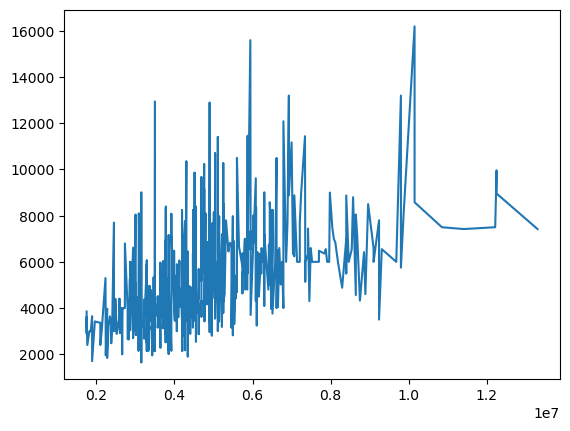

In [21]:
plt.plot(df.price, df.area)
plt.show()

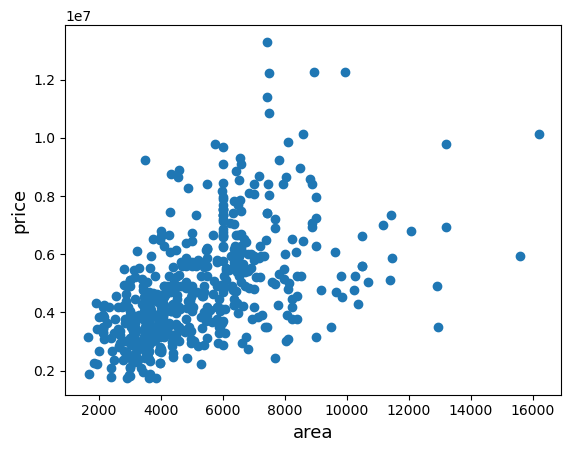

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = data['area'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('area', fontsize=13)
plt.show()


 mu = 4766729.25 and sigma = 1868722.83



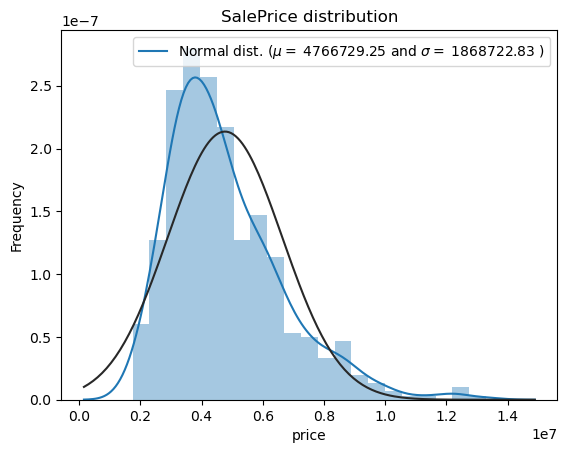

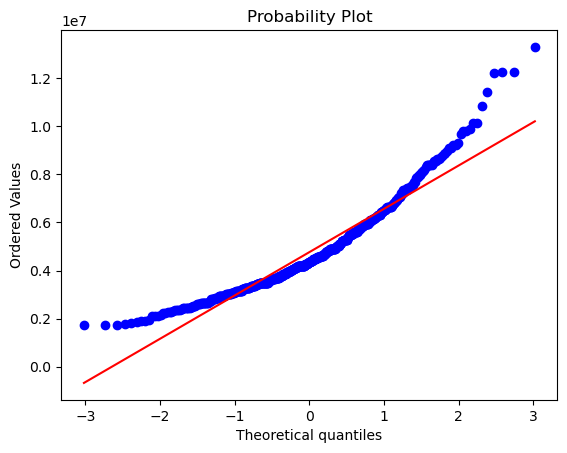

In [23]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

<Axes: >

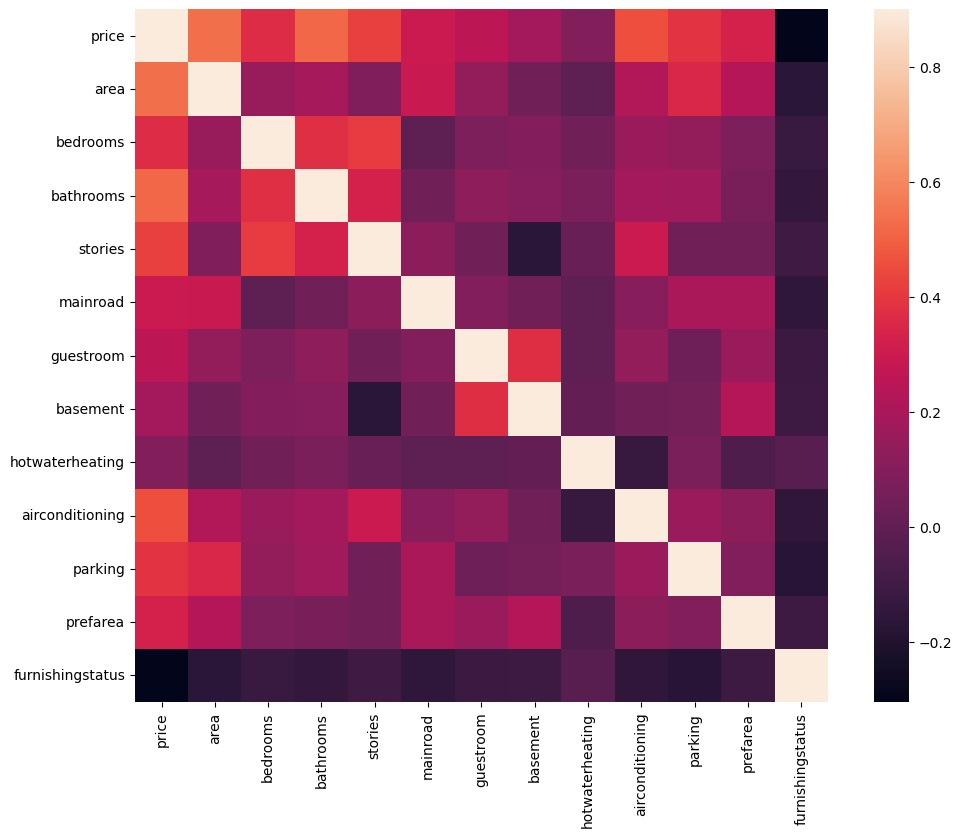

In [24]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

<Axes: title={'center': 'area'}, xlabel='price'>

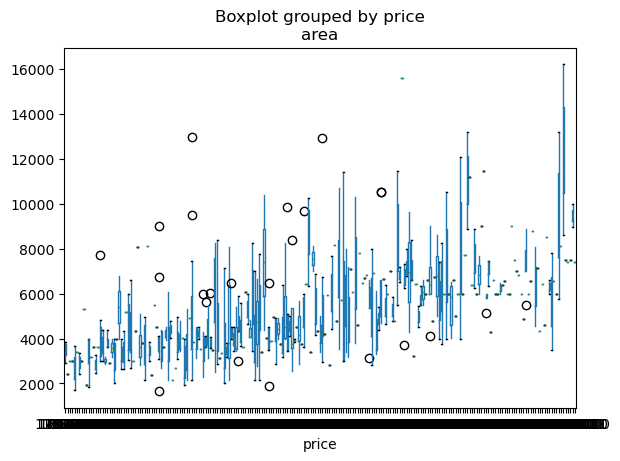

In [25]:
df.boxplot(by ='price', column =['area'], grid = False) 

<Axes: >

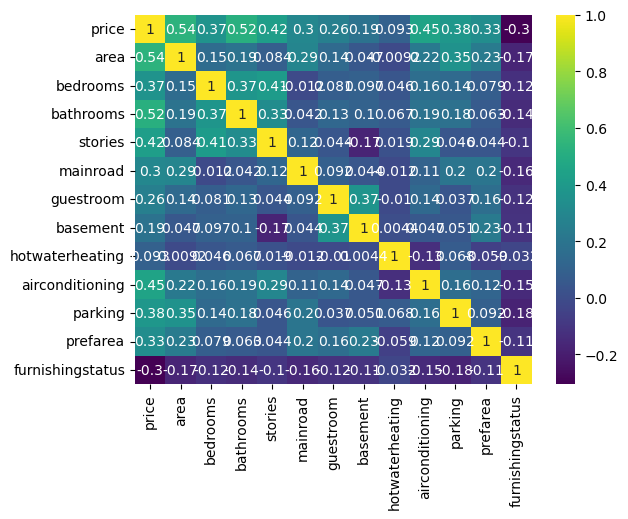

In [26]:
sns.heatmap(df.corr(), cmap='viridis',annot=True)

In [27]:
data=df.copy()

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

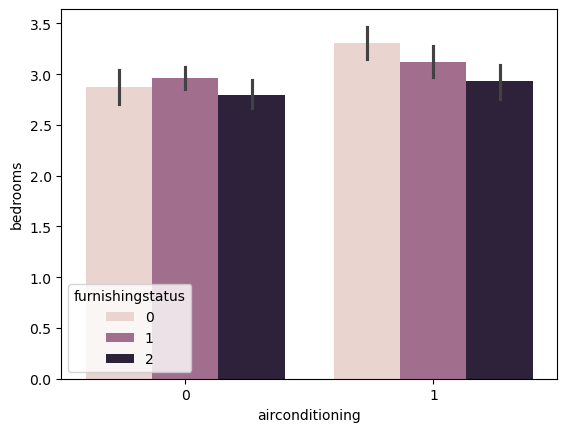

In [28]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

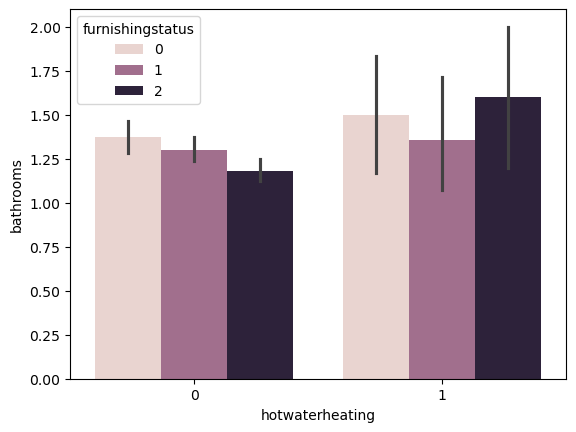

In [29]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

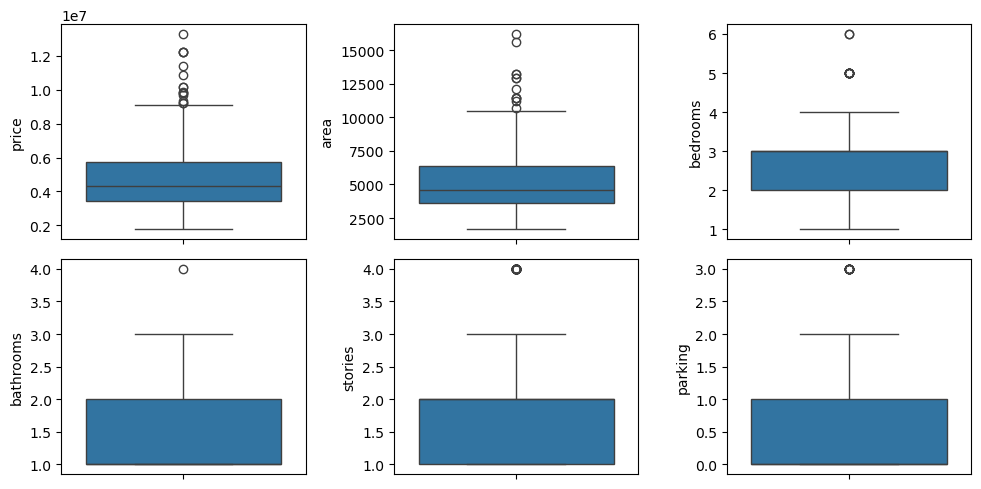

In [30]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x13a913ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x13a950470>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a913c50>],
 'medians': [<matplotlib.lines.Line2D at 0x13a9509b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a950c50>],
 'means': []}

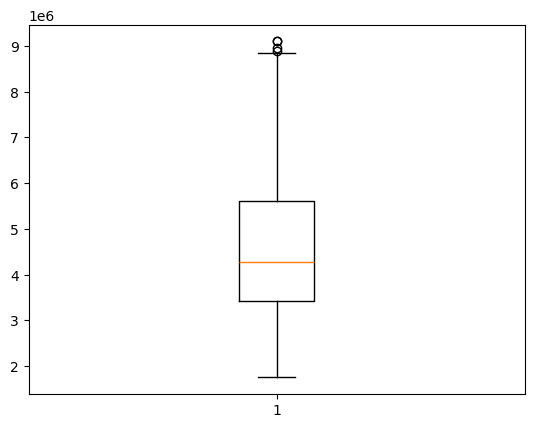

In [31]:
# Dealing with outliers in price 
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x13a996ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x13a9975f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a996cf0>],
 'medians': [<matplotlib.lines.Line2D at 0x13a997a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a997d10>],
 'means': []}

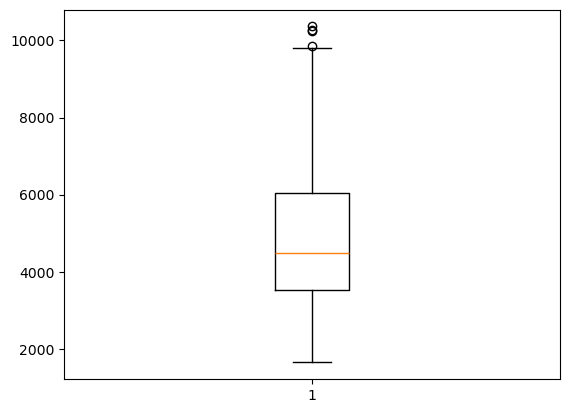

In [32]:
# Dealing with outliers in srea 

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

<Axes: xlabel='furnishingstatus', ylabel='price'>

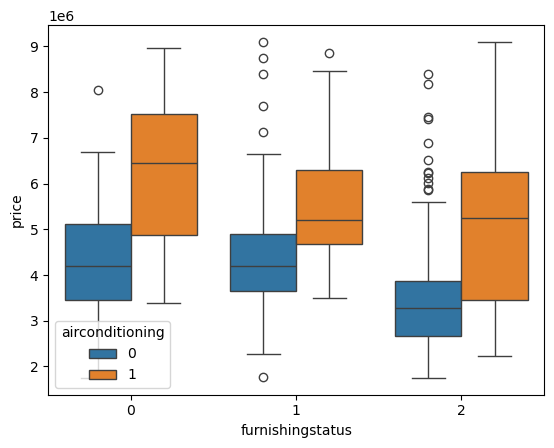

In [33]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='bedrooms', ylabel='Density'>

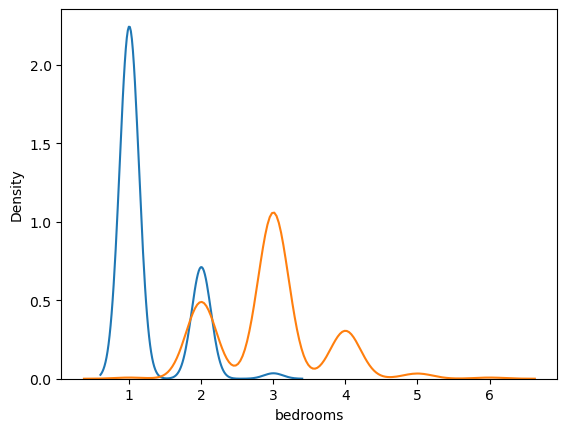

In [52]:
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

<Axes: xlabel='parking', ylabel='Density'>

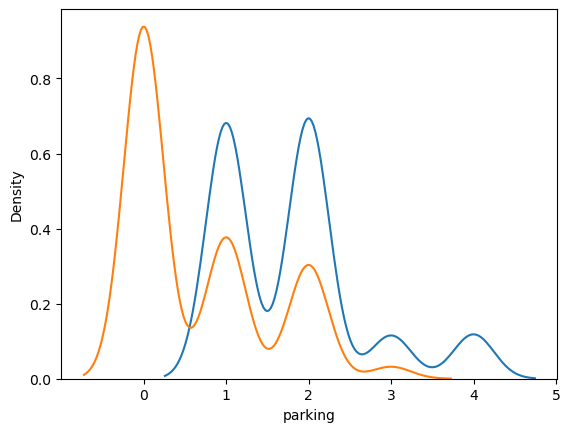

In [54]:
sns.distplot(df["stories"],hist=False)
sns.distplot(df["parking"],hist=False)

<Axes: xlabel='area', ylabel='price'>

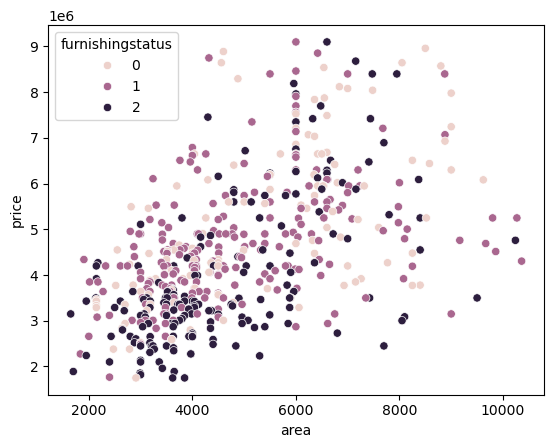

In [56]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

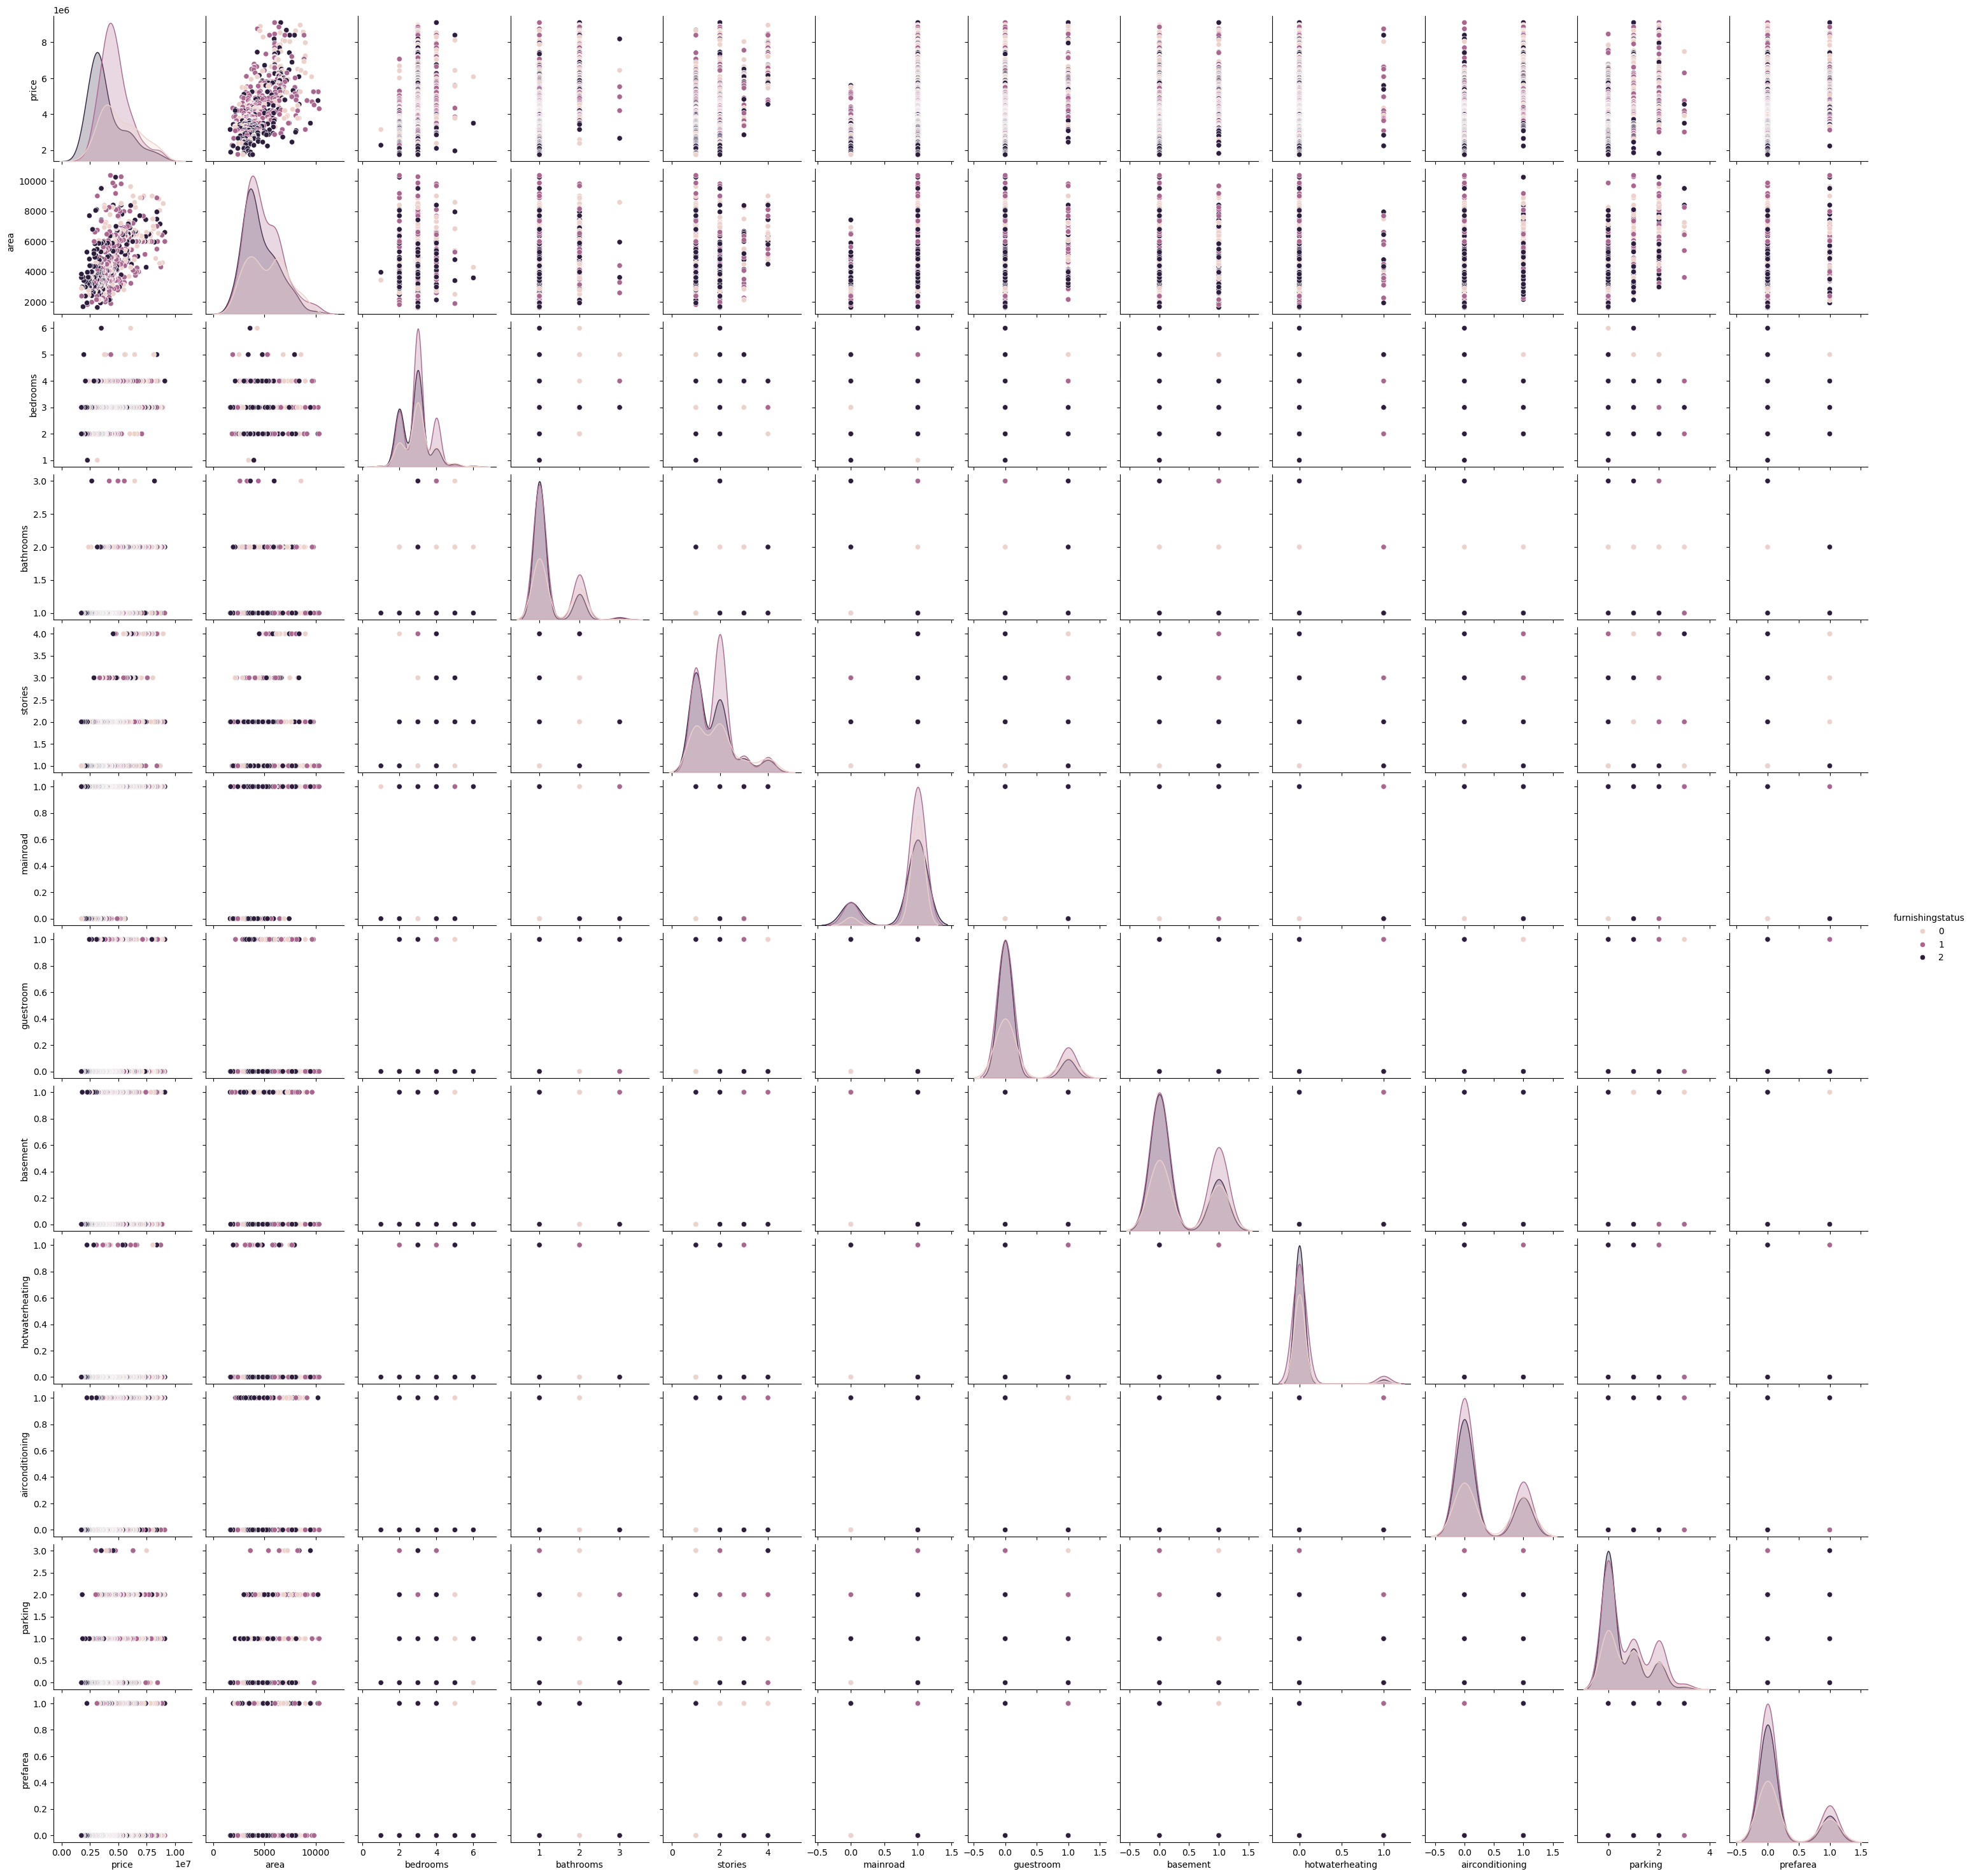

In [58]:
sns.pairplot(df,hue="furnishingstatus")

In [34]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [35]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),          
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
}

In [46]:
pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

Results for Random Forest Regressor : 
Mean Square Erroe : 2432734377039.762
R2 Score : 0.43508746482047733


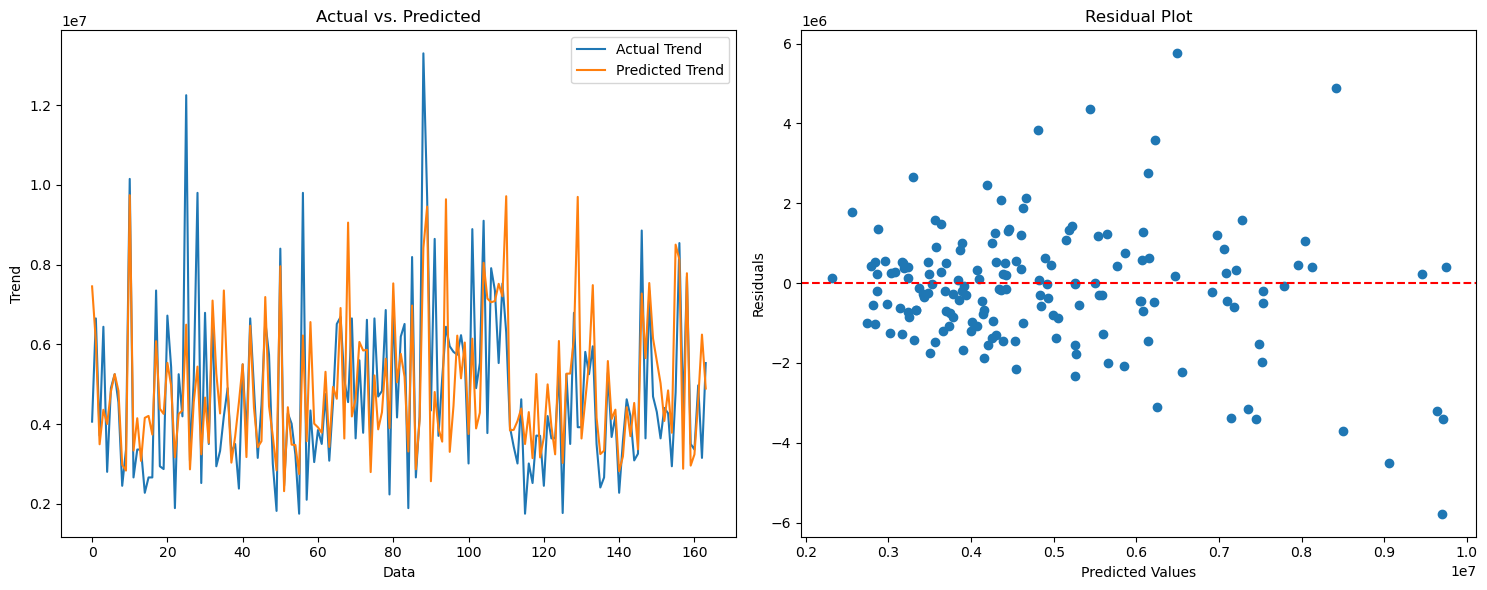

Results for Gradient Boost Regressor : 
Mean Square Erroe : 2233873006350.6797
R2 Score : 0.4812656592528439


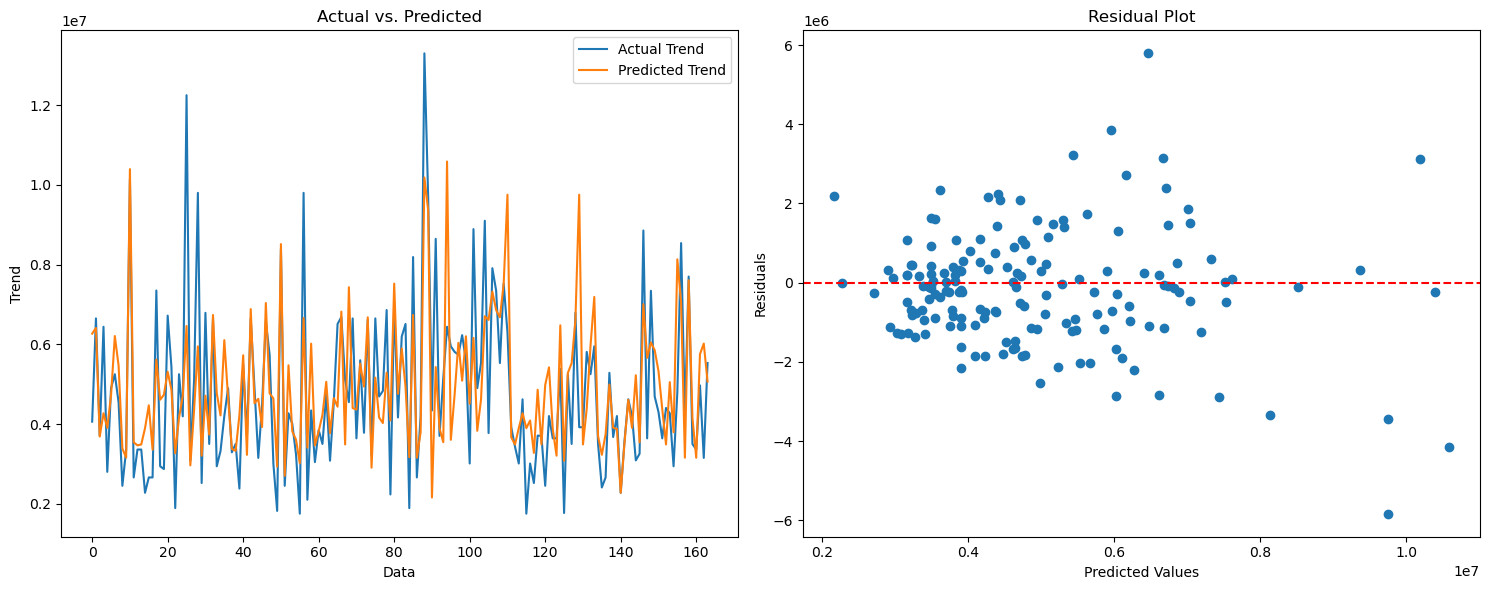

Results for Support Vector regressor : 
Mean Square Erroe : 4462160878761.277
R2 Score : -0.036171740815877707


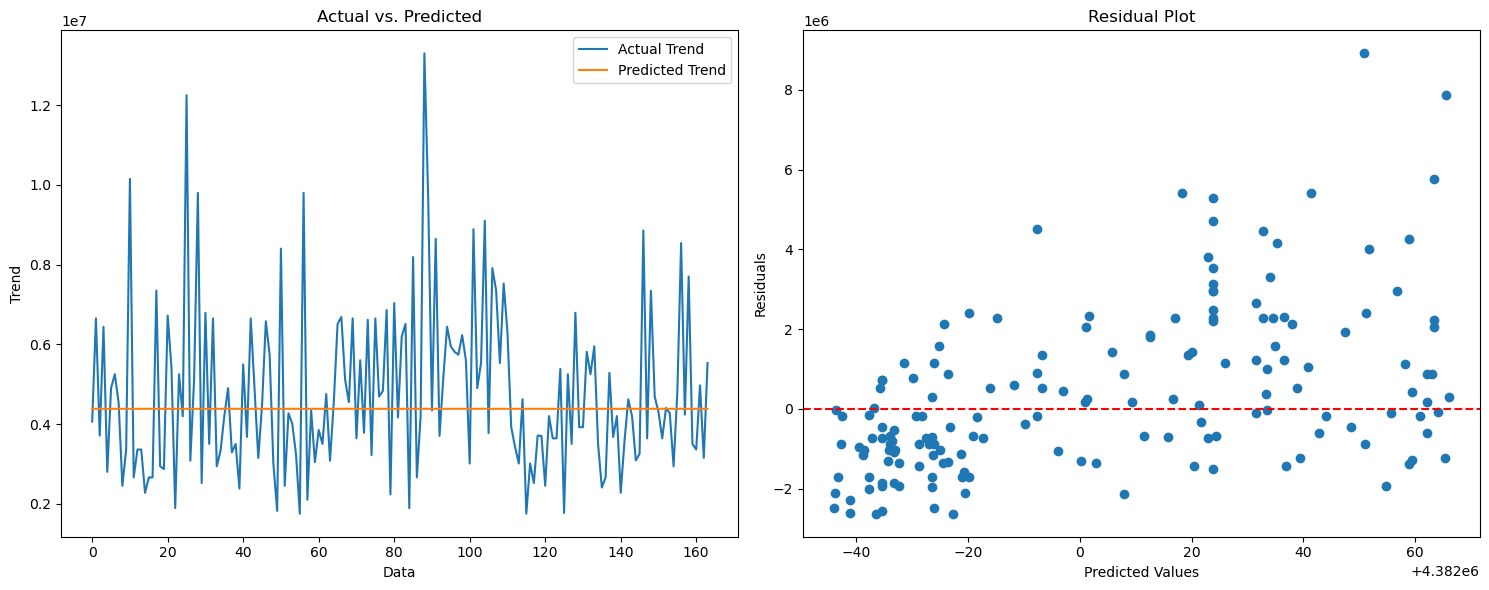

Results for Lasso Reg : 
Mean Square Erroe : 2044165042074.0183
R2 Score : 0.5253183137698083


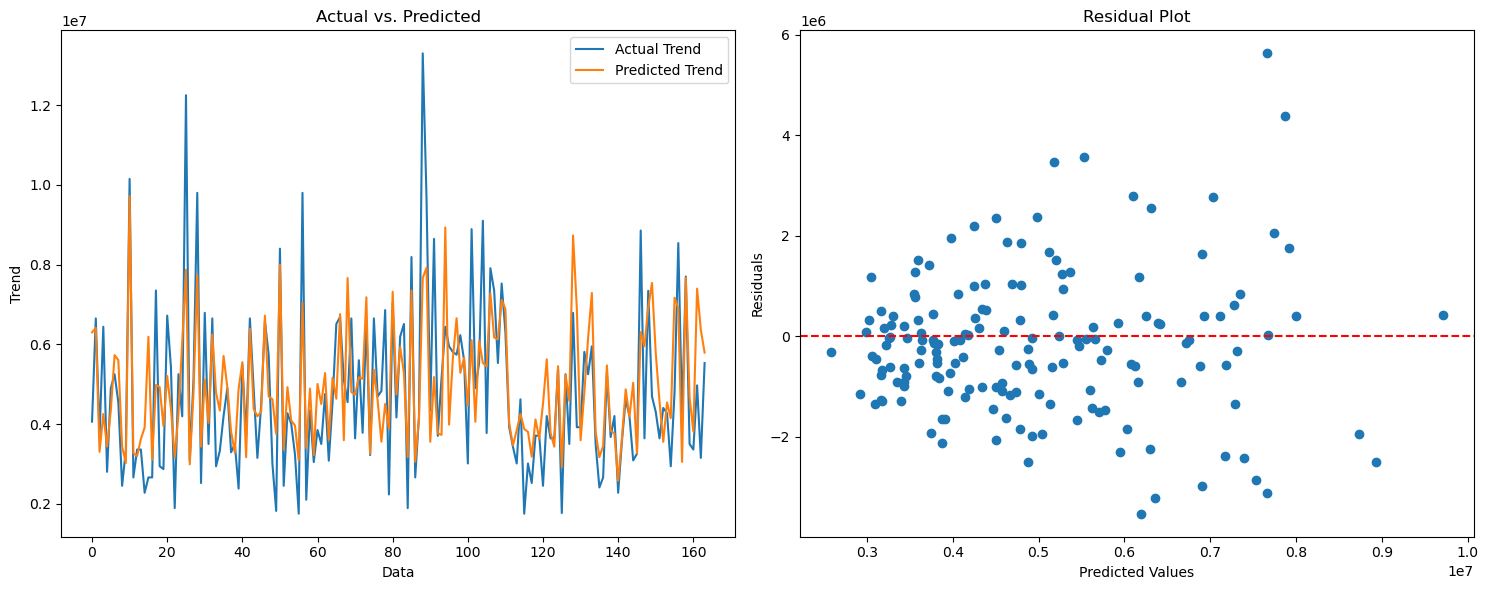

Results for Ridge Reg : 
Mean Square Erroe : 2043216053736.8716
R2 Score : 0.5255386811935817


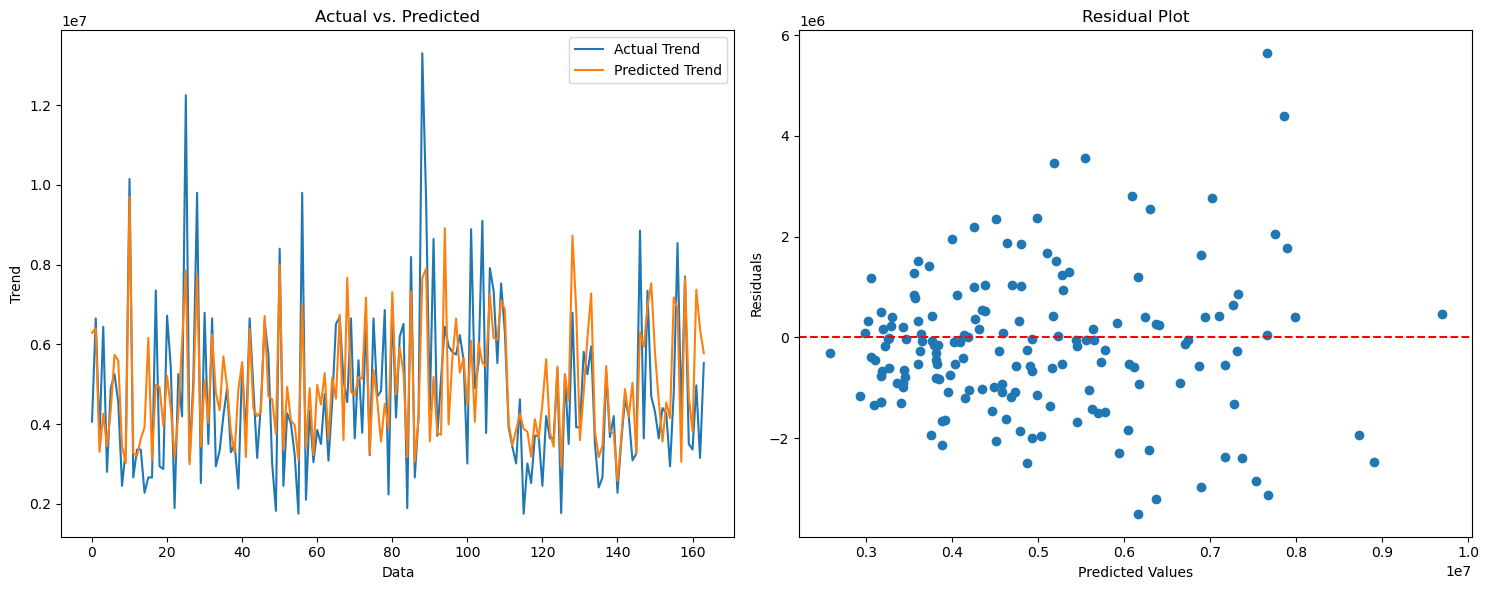

In [48]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

In [50]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data

,Accuracy
Random Forest Regressor,0.435087
Gradient Boost Regressor,0.481266
Support Vector regressor,-0.036172
Lasso Reg,0.525318
Ridge Reg,0.525539
